# 4.1 Multiple Linear Regression Prediction

## Preparation

In [4]:
# Import the libraries and set the random seed

from torch import nn
from torch.nn import Linear
import torch
torch.manual_seed(1)

## Sample of LR (1 row)

In [2]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [5]:
# Set the model
model = Linear(in_features=2, out_features=1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [29]:
# Create input tensor
X = torch.tensor([[1., 3.]])

In [30]:
yhat = model(X)
yhat

tensor([[-0.7090]], grad_fn=<AddmmBackward>)

## Prediction (mulit rows)

In [8]:
# Set the weight and bias
w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [9]:
# Sample tensor X
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])

In [10]:
yhat = model(X)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)

## Custom Modules

In [62]:
class LR(nn.Module):
    # Constractor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [64]:
custom_model = LR(input_size=2, output_size=1)

In [65]:
list(custom_model.parameters())

[Parameter containing:
 tensor([[ 0.3843, -0.6912]], requires_grad=True),
 Parameter containing:
 tensor([0.4384], requires_grad=True)]

In [66]:
custom_model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.3843, -0.6912]])),
             ('linear.bias', tensor([0.4384]))])

In [67]:
X = torch.tensor([[1., 3.]])
yhat = custom_model(X)
yhat

tensor([[-1.2510]], grad_fn=<AddmmBackward>)

In [68]:
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = custom_model(X)
yhat

tensor([[ 0.1315],
        [-0.5598],
        [-1.2510]], grad_fn=<AddmmBackward>)

# Multipule Linear Regression Training

## Preparation

In [95]:
# Import the libraries we need for this lab

from torch import nn,optim
from torch.nn import Linear
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [96]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

## Prediction

In [109]:
# Create a customized linear
class LR(nn.Module):
    # Constractor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [110]:
# Create a 2-D dataset class
class Data2D(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b # torch.mm: metrix multplication
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [127]:
# Create a dataset
data_set = Data2D()

In [128]:
# Create a cost function
criterion = nn.MSELoss()

In [129]:
# Create a trainloader
trainloader = DataLoader(dataset=data_set, batch_size=2)

In [130]:
#create the model
model = LR(2, 1)

In [131]:
# create a optimizer
optimizater = optim.SGD(model.parameters(), lr = 0.1)

## Training the Model

before training:


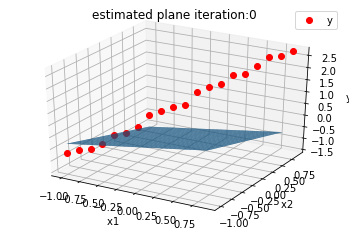

In [132]:
LOSS = []

# Before training
print('before training:')
Plot_2D_Plane(model, data_set)

# set the epoch
epochs = 100

# define the train function
def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            # Prediction
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            
            # Optimization
            optimizater.zero_grad()
            loss.backward()
            optimizater.step()
        
        # Plot after 10 times
        if epoch % 10 == 0:
            Plot_2D_Plane(model, data_set, epoch)
        else:
            pass

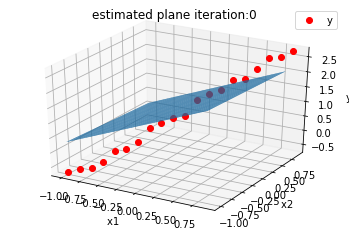

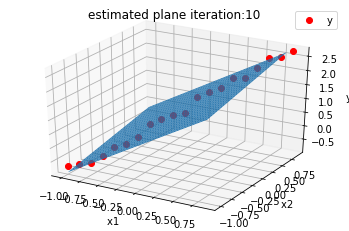

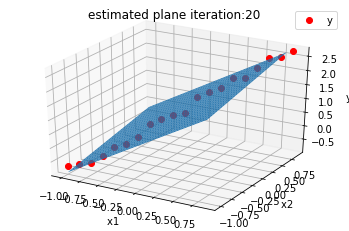

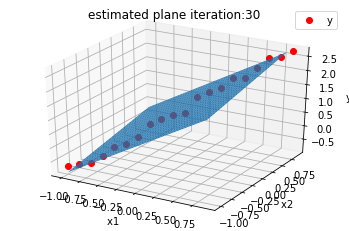

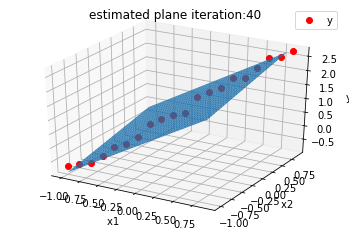

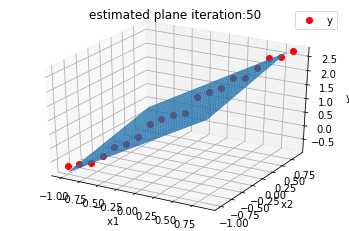

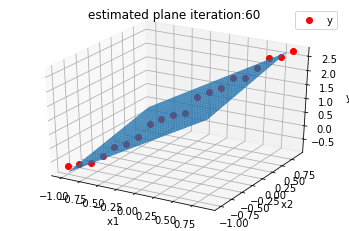

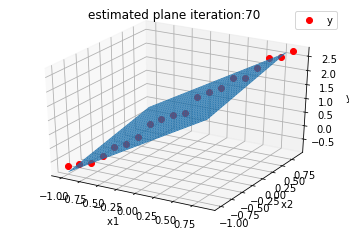

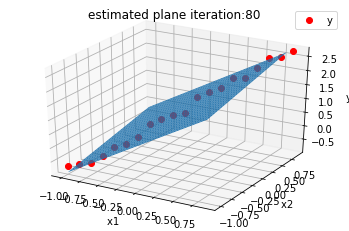

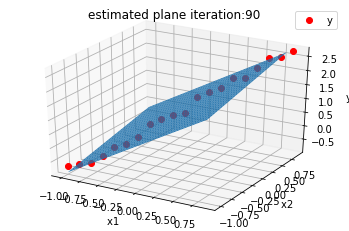

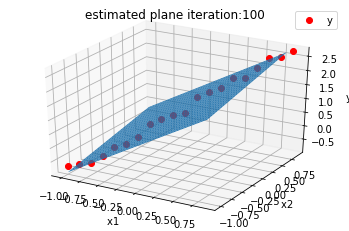

In [133]:
# Train the model
train_model(100)
Plot_2D_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost/total loss ')

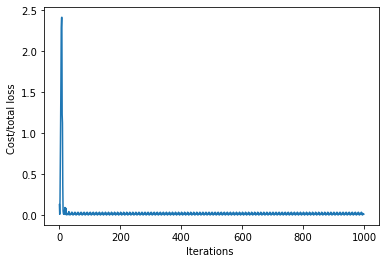

In [134]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")